<h1 style="color:blue;">Ağ Trafiği Sınıflandırması</h1>

## 1. Veri Toplama: 
Analiz yapmak için gerekli verileri ağ trafiği, paket yakalama aracı olan WİRESHARK wifi interface çalıştırılarak sağlanmıştır.

## 2. Veri Keşfi (Exploratory Data Analysis - EDA)

### 2.a.) Veri Seti Yapısının İncelenmesi

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
wireshark= pd.read_csv("time.csv")

In [9]:
wireshark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62016 entries, 0 to 62015
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               62016 non-null  int64  
 1   Time              62016 non-null  int64  
 2   Source            62016 non-null  object 
 3   Destination       62016 non-null  object 
 4   Protocol          62016 non-null  object 
 5   Length            62016 non-null  int64  
 6   Destination Port  40889 non-null  float64
 7   Stream index      40889 non-null  float64
 8   Info              62016 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 4.3+ MB


In [11]:
wireshark.describe()

,No.,Time,Length,Destination Port,Stream index
count,62016.000000,62016.000000,62016.000000,40889.000000,40889.000000
mean,31008.500000,86.391189,963.091863,36707.616376,114.703514
std,17902.621484,37.106657,549.782212,21378.896337,19.381774
min,1.000000,0.000000,42.000000,80.000000,0.000000
25%,15504.750000,49.000000,148.000000,443.000000,109.000000
50%,31008.500000,81.000000,1292.000000,49215.000000,126.000000
75%,46512.250000,127.000000,1294.000000,49229.000000,126.000000
max,62016.000000,170.000000,1474.000000,63125.000000,141.000000


In [13]:
wireshark.head()

,No.,Time,Source,Destination,Protocol,Length,Destination Port,Stream index,Info
0,1,0,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,wr-in-f207.1e100.net,TLSv1.2,110,443.0,0.0,Application Data
1,2,0,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,wr-in-f207.1e100.net,TCP,86,443.0,0.0,"51528 > 443 [FIN, ACK] Seq=25 Ack=1 Win=2048..."
2,3,0,wr-in-f207.1e100.net,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,TCP,86,51528.0,0.0,443 > 51528 [ACK] Seq=1 Ack=25 Win=311 Len=0...
3,4,0,wr-in-f207.1e100.net,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,TCP,86,51528.0,0.0,"443 > 51528 [FIN, ACK] Seq=1 Ack=26 Win=311 ..."
4,5,0,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,wr-in-f207.1e100.net,TCP,86,443.0,0.0,51528 > 443 [ACK] Seq=26 Ack=2 Win=2048 Len=...


In [15]:
wireshark.groupby(["Protocol"]).describe()

No.                                                          \
            count          mean           std      min       25%      50%   
Protocol                                                                    
ARP          10.0  28480.800000  23643.022733     35.0   5750.50  29657.0   
BROWSER       2.0    107.500000      0.707107    107.0    107.25    107.5   
DNS         652.0  17496.242331  16277.609162     18.0   4025.75  15426.0   
HTTP          6.0  32745.166667    287.376698  32478.0  32519.50  32670.0   
ICMP         49.0  19941.081633  19086.578733    241.0   4101.00  14579.0   
ICMPv6       28.0  32774.392857  22369.155923     86.0  12400.75  38991.5   
MDNS         12.0  15890.500000  22957.013606    165.0    435.75   5098.5   
NBNS          6.0   5947.833333   9055.553642     95.0     99.25    109.5   
QUIC      20360.0  12604.967485   8697.542733    238.0   6049.75  11330.5   
SSDP          8.0  31182.625000  32676.057539    203.0    663.75  31381.0   
TCP       35168.0  41115.388393  13303.265712      2.0  31576.75  42367.0   
TLSv1.2     702.0  37308.676638  14772.139032      1.0  29277.00  39609.0   
TLSv1.3    5013.0  35904.578895  13891.973649    126.0  27143.00  34324.0   

                                Time              ... Destination Port  \
               75%      max    count        mean  ...              75%   
Protocol                                          ...                    
ARP       39300.75  61976.0     10.0   79.400000  ...              NaN   
BROWSER     107.75    108.0      2.0   19.000000  ...              NaN   
DNS       25599.50  61895.0    652.0   59.312883  ...              NaN   
HTTP      32900.75  33206.0      6.0   90.000000  ...          49232.0   
ICMP      28219.00  61896.0     49.0   66.081633  ...              NaN   
ICMPv6    51917.50  62002.0     28.0   91.821429  ...              NaN   
MDNS      22827.25  61718.0     12.0   58.333333  ...              NaN   
NBNS      13256.00  17639.0      6.0   29.000000  ...              NaN   
QUIC      17220.25  61972.0  20360.0   48.904519  ...              NaN   
SSDP      61756.50  61761.0      8.0   90.500000  ...              NaN   
TCP       52160.25  62016.0  35168.0  107.039752  ...          49229.0   
TLSv1.2   48846.00  58377.0    702.0  101.772080  ...          49215.0   
TLSv1.3   45729.00  62006.0   5013.0   95.485937  ...          49229.0   

                  Stream index                                              \
              max        count        mean        std    min    25%    50%   
Protocol                                                                     
ARP           NaN          0.0         NaN        NaN    NaN    NaN    NaN   
BROWSER       NaN          0.0         NaN        NaN    NaN    NaN    NaN   
DNS           NaN          0.0         NaN        NaN    NaN    NaN    NaN   
HTTP      49232.0          6.0  130.000000   0.000000  130.0  130.0  130.0   
ICMP          NaN          0.0         NaN        NaN    NaN    NaN    NaN   
ICMPv6        NaN          0.0         NaN        NaN    NaN    NaN    NaN   
MDNS          NaN          0.0         NaN        NaN    NaN    NaN    NaN   
NBNS          NaN          0.0         NaN        NaN    NaN    NaN    NaN   
QUIC          NaN          0.0         NaN        NaN    NaN    NaN    NaN   
SSDP          NaN          0.0         NaN        NaN    NaN    NaN    NaN   
TCP       63125.0      35168.0  115.412563  18.578734    0.0  109.0  126.0   
TLSv1.2   63124.0        702.0  105.668091  24.926988    0.0  112.0  112.0   
TLSv1.3   63125.0       5013.0  110.976262  22.948675   12.0  107.0  126.0   

                        
            75%    max  
Protocol                
ARP         NaN    NaN  
BROWSER     NaN    NaN  
DNS         NaN    NaN  
HTTP      130.0  130.0  
ICMP        NaN    NaN  
ICMPv6      NaN    NaN  
MDNS        NaN    NaN  
NBNS        NaN    NaN  
QUIC        NaN    NaN  
SSDP        NaN    NaN  
TCP       126.0  141.0

### 2.b) Veri seti dönüşümleri

In [18]:
wireshark.dtypes

No.                   int64
Time                  int64
Source               object
Destination          object
Protocol             object
Length                int64
Destination Port    float64
Stream index        float64
Info                 object
dtype: object

In [20]:
wireshark.Protocol =pd.Categorical(wireshark.Protocol)

In [22]:
wireshark.dtypes

No.                    int64
Time                   int64
Source                object
Destination           object
Protocol            category
Length                 int64
Destination Port     float64
Stream index         float64
Info                  object
dtype: object

### Veri Setinin Betimlenmesi

In [25]:
wireshark.shape

(62016, 9)

In [27]:
wireshark.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Stream index', 'Info'],
      dtype='object')

In [29]:
wireshark.describe().T

,count,mean,std,min,25%,50%,75%,max
No.,62016.0,31008.500000,17902.621484,1.0,15504.75,31008.5,46512.25,62016.0
Time,62016.0,86.391189,37.106657,0.0,49.00,81.0,127.00,170.0
Length,62016.0,963.091863,549.782212,42.0,148.00,1292.0,1294.00,1474.0
Destination Port,40889.0,36707.616376,21378.896337,80.0,443.00,49215.0,49229.00,63125.0
Stream index,40889.0,114.703514,19.381774,0.0,109.00,126.0,126.00,141.0


In [31]:
wireshark.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
No.,62016.0,NaN,NaN,NaN,31008.5,17902.621484,1.0,15504.75,31008.5,46512.25,62016.0
Time,62016.0,NaN,NaN,NaN,86.391189,37.106657,0.0,49.0,81.0,127.0,170.0
Source,62016,90,cs531.wpc.edgecastcdn.net,18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,62016,95,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,43419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protocol,62016,13,TCP,35168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,62016.0,NaN,NaN,NaN,963.091863,549.782212,42.0,148.0,1292.0,1294.0,1474.0
Destination Port,40889.0,NaN,NaN,NaN,36707.616376,21378.896337,80.0,443.0,49215.0,49229.0,63125.0
Stream index,40889.0,NaN,NaN,NaN,114.703514,19.381774,0.0,109.0,126.0,126.0,141.0
Info,62016,36206,Protected Payload (KP0),16168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.c) Eksik değerlerin İncelenmesi

In [34]:
# Hiç eksik gözlem var mı
wireshark.isnull().values.any()

True

Hangi değişkende kaçar tane var?

In [37]:
wireshark.isnull().sum()

No.                     0
Time                    0
Source                  0
Destination             0
Protocol                0
Length                  0
Destination Port    21127
Stream index        21127
Info                    0
dtype: int64

In [39]:
wireshark.loc[wireshark['Protocol'] == 'DNS', 'Destination Port'] = 53

In [41]:
wireshark.isnull().sum()

No.                     0
Time                    0
Source                  0
Destination             0
Protocol                0
Length                  0
Destination Port    20475
Stream index        21127
Info                    0
dtype: int64

In [43]:
filtered_df = wireshark[wireshark['Destination Port'].isnull()]
filtered_df['Protocol'].value_counts()

Protocol
QUIC       20360
ICMP          49
ICMPv6        28
MDNS          12
ARP           10
SSDP           8
NBNS           6
BROWSER        2
DNS            0
HTTP           0
TCP            0
TLSv1.2        0
TLSv1.3        0
Name: count, dtype: int64

In [45]:
wireshark.drop(columns=['Stream index'], inplace=True)

In [47]:
wireshark.isnull().sum()

No.                     0
Time                    0
Source                  0
Destination             0
Protocol                0
Length                  0
Destination Port    20475
Info                    0
dtype: int64

## Kategorik değişkenlerin sınıflarına ve sınıf sayısına Erişmek

### Object ve Kategorik Değişkenler ve Özetleri

In [51]:
kat_df = wireshark.select_dtypes(include =["object"])
kat_df.head()

,Source,Destination,Info
0,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,wr-in-f207.1e100.net,Application Data
1,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,wr-in-f207.1e100.net,"51528 > 443 [FIN, ACK] Seq=25 Ack=1 Win=2048..."
2,wr-in-f207.1e100.net,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,443 > 51528 [ACK] Seq=1 Ack=25 Win=311 Len=0...
3,wr-in-f207.1e100.net,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,"443 > 51528 [FIN, ACK] Seq=1 Ack=26 Win=311 ..."
4,2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9,wr-in-f207.1e100.net,51528 > 443 [ACK] Seq=26 Ack=2 Win=2048 Len=...


In [53]:
kat_df.Source.unique()

array(['2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9', 'wr-in-f207.1e100.net',
       'www.gstatic.com', 'gateway.fe2.apple-dns.net', '192.168.1.190',
       '192.168.1.1', 'zte_3c:85:10', '17.8.155.5',
       '2a01:b740:a41:632::4:1', '17.8.155.58',
       'fe80::10f7:a10d:fcf4:1cba', 'fe80::d672:26ff:fe3c:8510',
       'Apple_c3:68:53', '2a01:b740:a26:f000::5',
       'ec2-15-161-248-77.eu-south-1.compute.amazonaws.com',
       'clientservices.googleapis.com', 'accounts.google.com',
       'www.google.com', '2a06:98c1:3121::3', 'lh2.l.google.com',
       'googlehosted.l.googleusercontent.com', 'www.udemy.com',
       'mmx-ds.cdn.whatsapp.net',
       'media-router-apple71.prod.media.vip.ir2.yahoo.com',
       'google-ohttp-relay-safebrowsing.fastly-edge.com',
       '192.229.221.95', 'www3.l.google.com', 'update.googleapis.com',
       'mobile-gtalk.l.google.com', '2a01:b740:a26:f000::1',
       '2a01:b740:a1a:f000::3', 'ssl.gstatic.com',
       'a2-20-148-21.deploy.static.akamaitechnologie

In [55]:
kat_df["Source"].value_counts().count()

90

In [57]:
kat_df["Source"].value_counts()

Source
cs531.wpc.edgecastcdn.net                                          18835
2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9                              12749
dualstack.twimg.twitter.map.fastly.net                              3499
lh2.l.google.com                                                    3481
cs510.wpc.edgecastcdn.net                                           3124
                                                                   ...  
188.114.96.3                                                           4
2a02:e0:3200::d4fc:7e4a                                                3
g2a02-26f0-fa00-01b9-0000-0000-0000-02a1.deploy.static.akamaite        3
wr-in-f207.1e100.net                                                   2
192.229.221.95                                                         1
Name: count, Length: 90, dtype: int64

In [59]:
kat_df["Destination"].value_counts()

Destination
2a02:4e0:2d7c:9b49:3c3c:2374:f9de:bc9                43419
cs531.wpc.edgecastcdn.net                             4976
192.168.1.190                                         3681
dualstack.twimg.twitter.map.fastly.net                1314
cs510.wpc.edgecastcdn.net                             1305
                                                     ...  
media-router-apple71.prod.media.vip.ir2.yahoo.com        3
192.168.1.255                                            3
wr-in-f207.1e100.net                                     3
192.229.221.95                                           2
ff02::1                                                  2
Name: count, Length: 95, dtype: int64

In [61]:
kat_df["Destination"].value_counts().count()

95

In [63]:
kat_df["Info"].value_counts().count()

36206

In [65]:
kat_df["Info"].value_counts()

Info
Protected Payload (KP0)                                                                                          16168
Application Data                                                                                                  3242
Application Data, Application Data, Application Data                                                              1121
Application Data, Application Data                                                                                1029
Protected Payload (KP0), DCID=e218f64b957d52d2                                                                     785
                                                                                                                 ...  
443  >  49205 [ACK] Seq=226721 Ack=61590 Win=254208 Len=0                                                            1
443  >  49205 [ACK] Seq=226721 Ack=58750 Win=248576 Len=0                                                            1
443  >  49205 [ACK] Seq=226721 Ack=55910 Wi

In [67]:
kat_df = wireshark.select_dtypes(include =["category"])

In [69]:
kat_df.head()

,Protocol
0,TLSv1.2
1,TCP
2,TCP
3,TCP
4,TCP


### Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek 

In [72]:
kat_df.Protocol.unique()

['TLSv1.2', 'TCP', 'DNS', 'ARP', 'ICMPv6', ..., 'MDNS', 'SSDP', 'QUIC', 'ICMP', 'HTTP']
Length: 13
Categories (13, object): ['ARP', 'BROWSER', 'DNS', 'HTTP', ..., 'SSDP', 'TCP', 'TLSv1.2', 'TLSv1.3']

In [74]:
kat_df["Protocol"].value_counts().count()

13

### Kategorik Değişkenin Sınıflarına ve Frekanslarına Erişmek 

In [77]:
kat_df["Protocol"].value_counts()

Protocol
TCP        35168
QUIC       20360
TLSv1.3     5013
TLSv1.2      702
DNS          652
ICMP          49
ICMPv6        28
MDNS          12
ARP           10
SSDP           8
HTTP           6
NBNS           6
BROWSER        2
Name: count, dtype: int64

<Axes: ylabel='Protocol'>

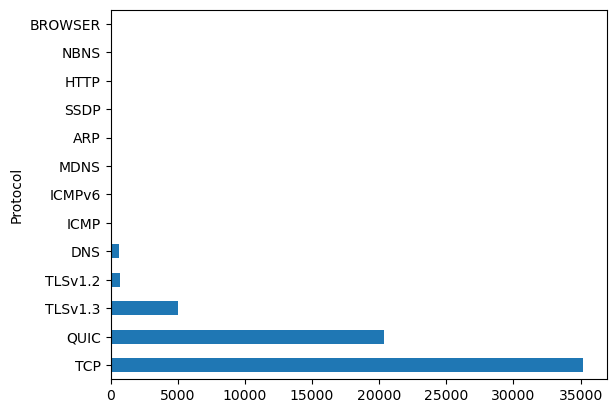

In [79]:
wireshark["Protocol"].value_counts().plot.barh()

### Sürekli Değişken Özetleri

In [82]:
df_num = wireshark.select_dtypes(include = ["float64","int64"])
df_num.head()

,No.,Time,Length,Destination Port
0,1,0,110,443.0
1,2,0,86,443.0
2,3,0,86,51528.0
3,4,0,86,51528.0
4,5,0,86,443.0


In [84]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
No.,62016.0,31008.500000,17902.621484,1.0,15504.75,31008.5,46512.25,62016.0
Time,62016.0,86.391189,37.106657,0.0,49.00,81.0,127.00,170.0
Length,62016.0,963.091863,549.782212,42.0,148.00,1292.0,1294.00,1474.0
Destination Port,41541.0,36132.309814,21694.251135,53.0,443.00,49215.0,49229.00,63125.0


In [86]:
df_num["Time"].describe().T

count    62016.000000
mean        86.391189
std         37.106657
min          0.000000
25%         49.000000
50%         81.000000
75%        127.000000
max        170.000000
Name: Time, dtype: float64

In [88]:
print("Length Ortalama :"+ str(df_num["Length"].mean()))
print("Length Dolu Gözlem Sayısı :"+ str(df_num["Length"].count()))
print("Length Maksimum Değer :"+ str(df_num["Length"].max()))
print("Length Minimum Değer :"+ str(df_num["Length"].min()))
print("Length Medyan :"+ str(df_num["Length"].median()))
print("Length Standart sapma :"+ str(df_num["Length"].std()))

Length Ortalama :963.0918633900928
Length Dolu Gözlem Sayısı :62016
Length Maksimum Değer :1474
Length Minimum Değer :42
Length Medyan :1292.0
Length Standart sapma :549.7822115200838


## Dağılım Grafikleri

### Barplot

In [92]:
wireshark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62016 entries, 0 to 62015
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   No.               62016 non-null  int64   
 1   Time              62016 non-null  int64   
 2   Source            62016 non-null  object  
 3   Destination       62016 non-null  object  
 4   Protocol          62016 non-null  category
 5   Length            62016 non-null  int64   
 6   Destination Port  41541 non-null  float64 
 7   Info              62016 non-null  object  
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 3.4+ MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Protocol'>

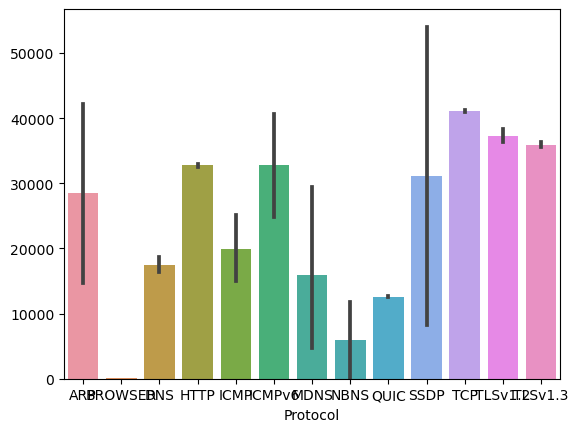

In [94]:
sns.barplot(x = "Protocol", y= wireshark.Protocol.index, data=wireshark)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


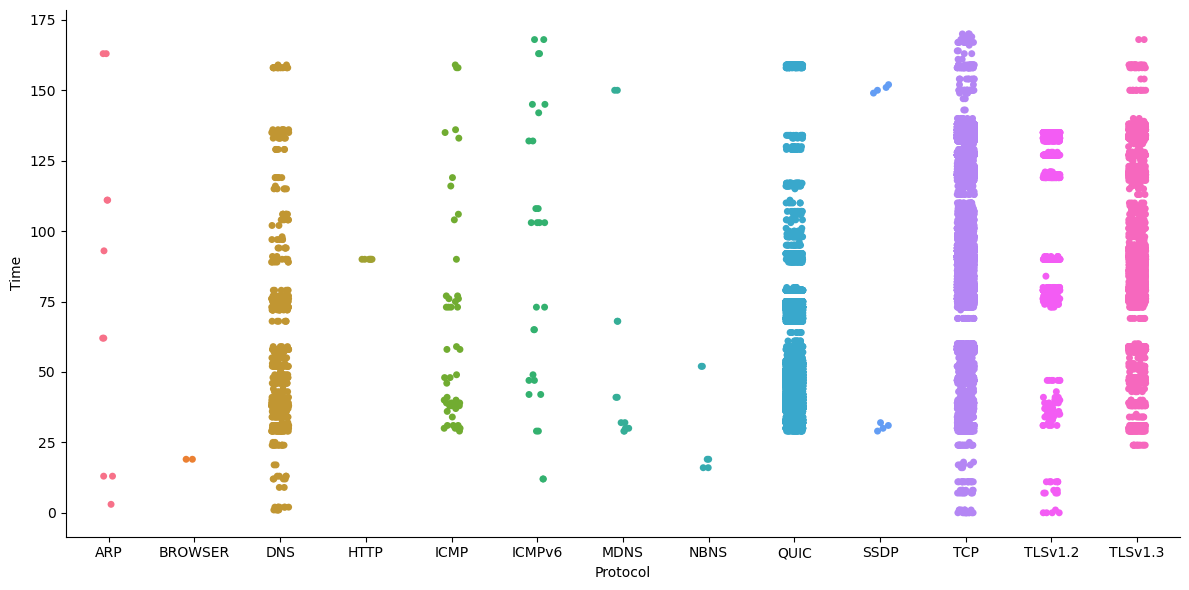

In [96]:
sns.catplot(x ="Protocol", y = "Time", data = wireshark,height=6, aspect=2,hue="Protocol" )

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


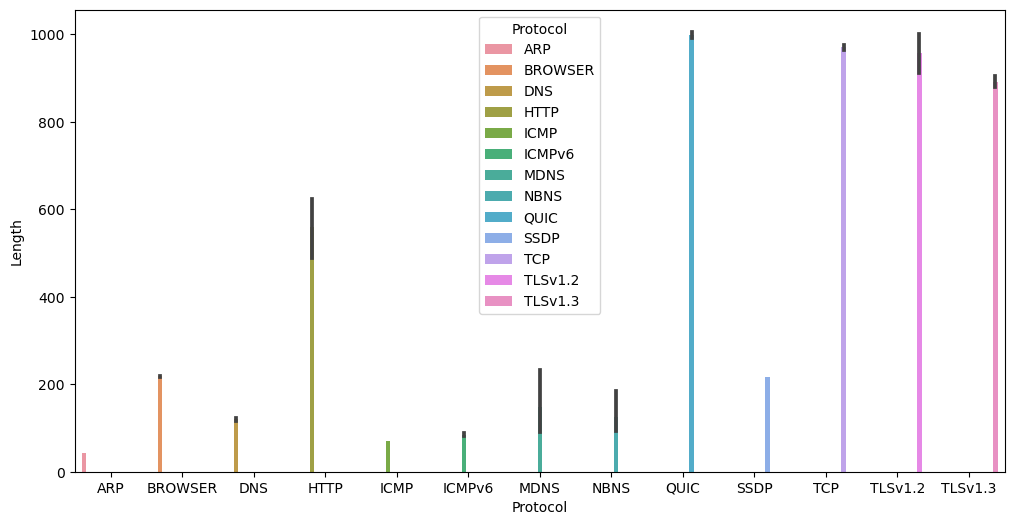

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # 12 birim genişlik, 6 birim yükseklik

# Bar plot çizdir
sns.barplot(x="Protocol", y="Length", data=wireshark, hue="Protocol")

# Grafiği göster
plt.show()


## Histogram ve Yoğunluk

/var/folders/9f/3_v_spgn6tqdx3krk10vsrlm0000gn/T/ipykernel_9829/3072574426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wireshark.Time,bins=10, kde=False)


<Axes: xlabel='Time'>

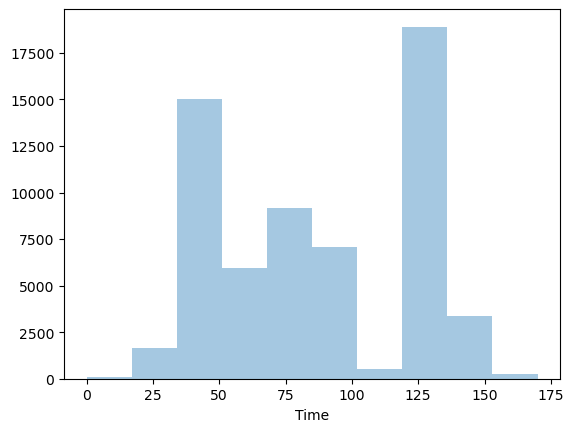

In [101]:
sns.distplot(wireshark.Time,bins=10, kde=False)

/var/folders/9f/3_v_spgn6tqdx3krk10vsrlm0000gn/T/ipykernel_9829/3516642977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wireshark.Time)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Density'>

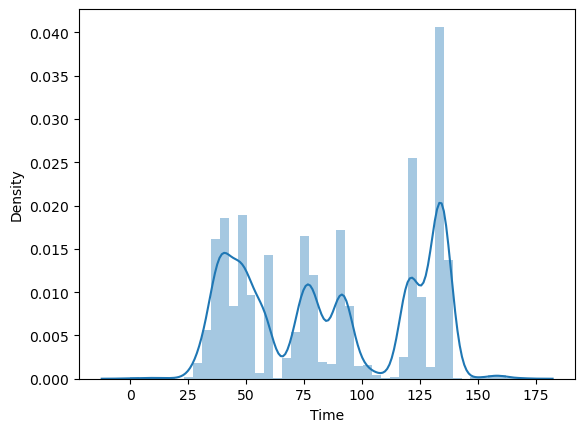

In [103]:
sns.distplot(wireshark.Time)

## Korelasyon Matrisi

In [106]:
numeric_df = wireshark.select_dtypes(include=['int64', 'float64'])

sns.distplot(wireshark.Time, hist=False)

In [109]:
corr_matrix = numeric_df.corr()

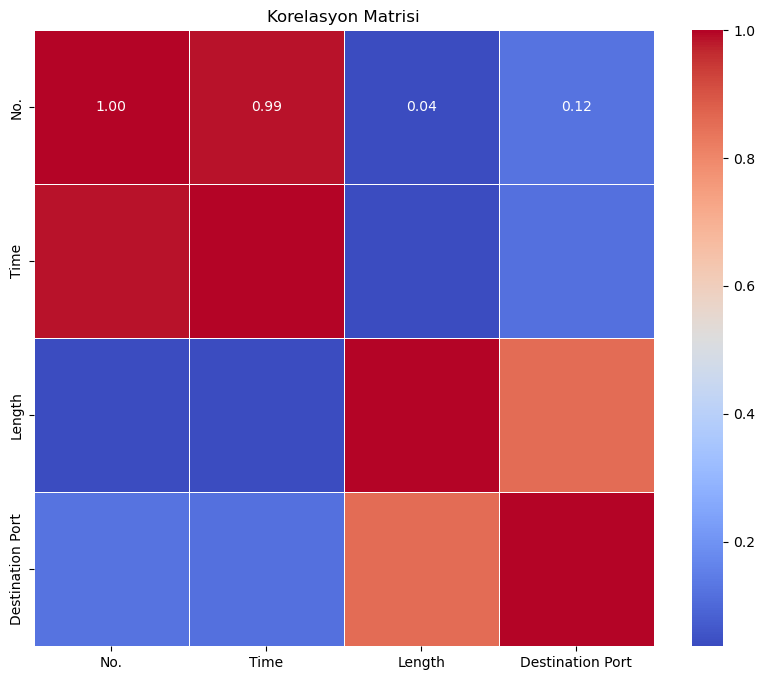

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

<h1 style="color:blue;">Naive Bayes ile Sınıflandırma</h1>


Accuracy: 0.785149951628507
Precision: 0.708371494998986
Recall: 0.785149951628507
F1 Score: 0.744670135305346
Confusion Matrix:
	ARP	BROWSER	DNS	HTTP	ICMP	ICMPv6	MDNS	NBNS	QUIC	SSDP	TCP	TLSv1.2	TLSv1.3	
ARP	4	0	0	0	0	0	0	0	0	0	0	0	
BROWSER	0	5	0	0	0	0	0	69	0	49	0	0	
DNS	0	0	0	0	0	0	0	0	0	1	0	0	
HTTP	0	0	0	13	0	0	0	0	0	0	0	0	
ICMP	0	2	0	0	0	0	0	2	0	4	0	0	
ICMPv6	0	1	0	0	0	0	0	2	0	2	0	0	
MDNS	0	1	0	0	0	0	1	2	0	0	0	0	
NBNS	0	40	0	0	0	0	4	3492	2	489	0	0	
QUIC	0	0	0	0	0	0	0	0	1	0	0	0	
SSDP	0	17	0	0	0	0	0	825	0	6223	0	0	
TCP	0	3	0	0	0	0	0	13	0	143	0	0	
TLSv1.2	0	2	2	0	0	0	0	157	0	833	0	0	


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


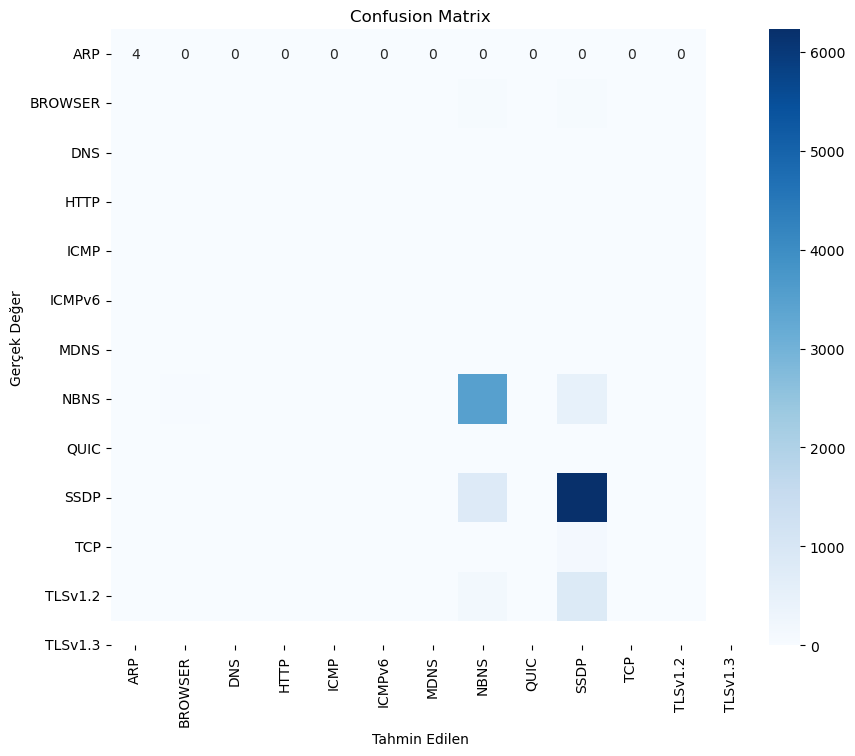

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Bağımsız değişkenler ve hedef değişkeni seçme
X = wireshark[['Time', 'Length']]
y = wireshark['Protocol']

# Veri setini eğitim ve test alt kümelerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini eğitme
model = GaussianNB()
model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_naive_bayes = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("Accuracy:", accuracy_naive_bayes)

# Performans ölçütlerini hesaplama
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes, average='weighted')
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes, average='weighted')
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, average='weighted')

print("Precision:", precision_naive_bayes)
print("Recall:", recall_naive_bayes)
print("F1 Score:", f1_naive_bayes)

# Confusion matrix'i oluşturma
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Sınıf etiketlerini al
classes_naive_bayes = model.classes_

# Sınıf etiketlerini kullanarak confusion matrix'i yazdır
print("Confusion Matrix:")
print("\t", end="")
for cls in classes_naive_bayes:
    print(cls, end="\t")
print()  # Yeni satır

for i, row in enumerate(cm_naive_bayes):
    print(classes_naive_bayes[i], end="\t")
    for cell in row:
        print(cell, end="\t")
    print()  # Yeni satır
    
# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm_naive_bayes, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()

plt.show()

<h1 style="color:blue;">Karar Ağacı(Decision Tree) ile Sınıflandırma</h1>

Accuracy: 0.9291357626572073
Precision: 0.9239887672426934
Recall: 0.9291357626572073
F1 Score: 0.9196277668603088
Confusion Matrix:
	ARP	BROWSER	DNS	HTTP	ICMP	ICMPv6	MDNS	NBNS	QUIC	SSDP	TCP	TLSv1.2	TLSv1.3	
ARP	4	0	0	0	0	0	0	0	0	0	0	0	0	
BROWSER	0	0	0	0	0	0	0	0	0	0	0	0	0	
DNS	0	0	68	0	0	1	0	0	29	1	10	2	12	
HTTP	0	0	0	0	0	0	0	0	0	0	0	0	1	
ICMP	0	0	2	0	10	0	0	0	0	0	1	0	0	
ICMPv6	0	0	0	0	0	1	0	0	1	0	5	1	0	
MDNS	0	0	2	0	0	0	0	0	3	0	0	0	0	
NBNS	0	1	1	0	0	0	0	1	1	0	0	0	0	
QUIC	0	0	25	0	0	0	0	0	3934	0	31	3	34	
SSDP	0	0	0	0	0	0	0	0	0	1	0	0	0	
TCP	0	0	3	0	0	0	0	0	18	0	7022	9	13	
TLSv1.2	0	0	3	0	0	0	0	0	9	0	60	67	20	
TLSv1.3	0	0	13	0	0	0	0	0	41	0	504	19	417	


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


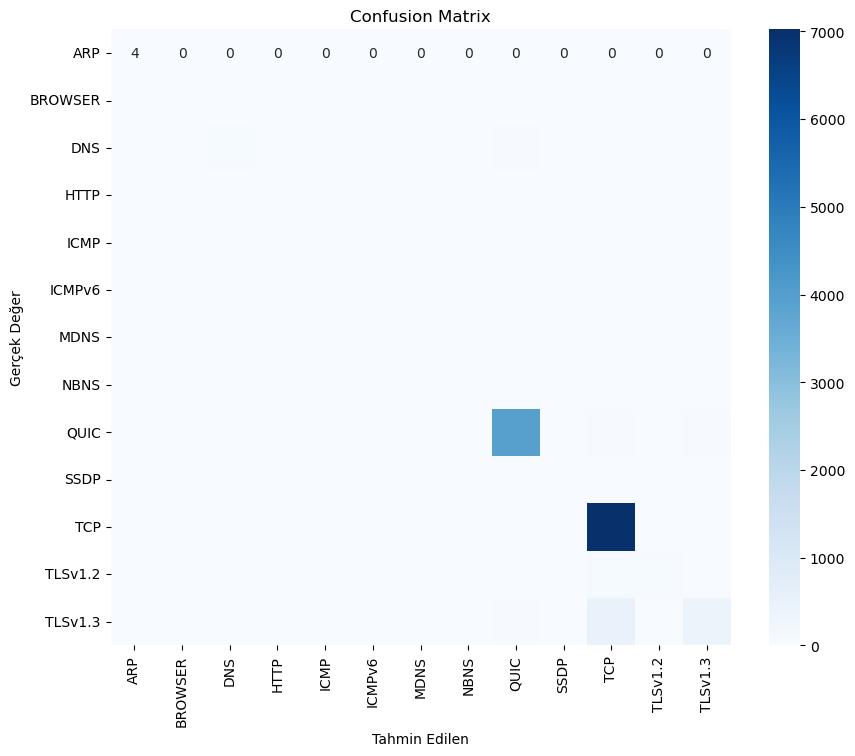

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Bağımsız değişkenler ve hedef değişkeni seçme
X = wireshark[['Time', 'Length']]
y = wireshark['Protocol']

# Veri setini eğitim ve test alt kümelerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini eğitme
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_decision_tree = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy:", accuracy_decision_tree)

# Performans ölçütlerini hesaplama
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)

# Confusion matrix'i oluşturma
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Sınıf etiketlerini al
classes_decision_tree = model.classes_

# Sınıf etiketlerini kullanarak confusion matrix'i yazdır
print("Confusion Matrix:")
print("\t", end="")
for cls in classes_decision_tree:
    print(cls, end="\t")
print()  # Yeni satır

for i, row in enumerate(cm_decision_tree):
    print(classes_decision_tree[i], end="\t")
    for cell in row:
        print(cell, end="\t")
    print()  # Yeni satır
    
# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()

<h1 style="color:blue;">Rastgele Ormanlar (Random Forests)ile Sınıflandırma</h1>

Rastgele Ormanlar modelinin doğruluk payı: 0.9291357626572073
Precision: 0.924155190731413
Recall: 0.9291357626572073
F1 Score: 0.9195701832247489

Tahminler ve Gerçek Değerler:
		ARP	BROWSER	DNS	HTTP	ICMP	ICMPv6	MDNS	NBNS	QUIC	SSDP	TCP	TLSv1.2	TLSv1.3	
ARP		2	0	0	0	0	0	0	0	0	0	2	0	0	
BROWSER		0	0	0	0	0	0	0	0	0	0	0	0	0	
DNS		0	0	66	0	0	1	0	0	32	1	11	2	10	
HTTP		0	0	0	0	0	0	0	0	0	0	0	0	1	
ICMP		0	0	2	0	8	0	0	0	0	0	3	0	0	
ICMPv6		0	0	1	0	0	1	0	0	1	0	4	1	0	
MDNS		0	0	1	0	0	0	0	0	3	0	1	0	0	
NBNS		0	1	1	0	0	0	0	1	1	0	0	0	0	
QUIC		0	0	21	0	0	0	0	0	3939	0	31	2	34	
SSDP		0	0	0	0	0	0	0	0	0	1	0	0	0	
TCP		0	0	4	0	0	0	0	0	18	0	7018	9	16	
TLSv1.2		0	0	5	0	0	0	0	0	10	0	61	67	16	
TLSv1.3		0	0	9	0	0	0	0	0	44	0	503	16	422	


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


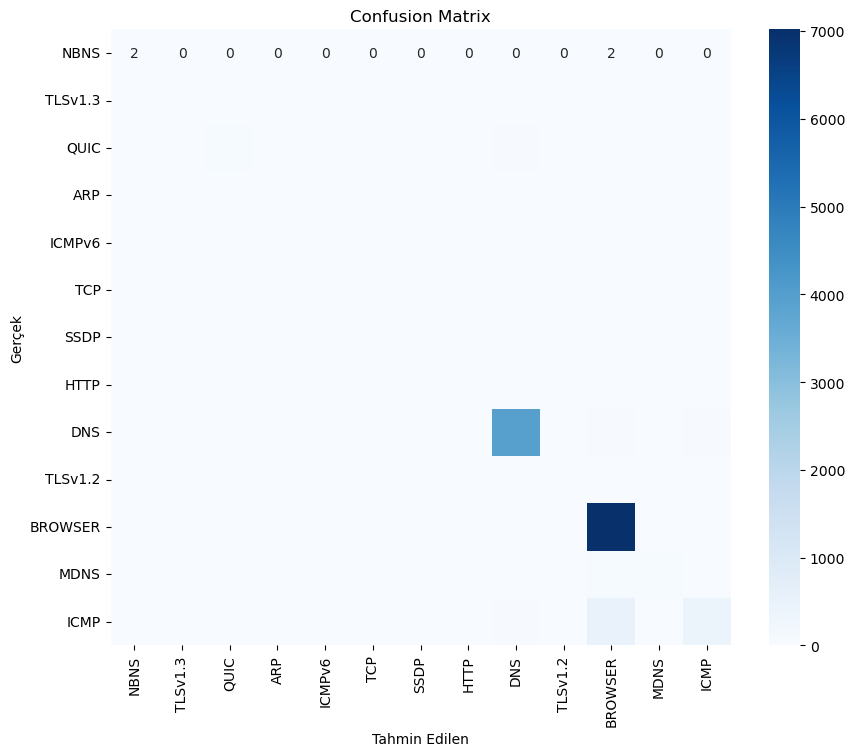

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Ormanlar modelini oluşturalım
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitelim
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_random_forest = model.predict(X_test)

# Modelin doğruluğunu değerlendirelim
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print("Rastgele Ormanlar modelinin doğruluk payı:", random_forest_accuracy)

# Confusion matrix'i hesaplayalım
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Precision, recall ve F1 score değerlerini hesaplayalım
random_forest_precision = precision_score(y_test, y_pred_random_forest, average='weighted')
random_forest_recall = recall_score(y_test, y_pred_random_forest, average='weighted')
random_forest_f1 = f1_score(y_test, y_pred_random_forest, average='weighted')

print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)

# Tahminleri ve gerçek değerleri bağımlı değişkene göre tabloda gösterme
classes_random_forest = model.classes_

print("\nTahminler ve Gerçek Değerler:")
print("\t\t", end="")
for cls in classes_random_forest:
    print(cls, end="\t")
print()  # Yeni satır

for i, row in enumerate(cm_random_forest):
    print(classes_random_forest[i], end="\t\t")
    for cell in row:
        print(cell, end="\t")
    print()  # Yeni satır
    
plt.figure(figsize=(10, 8))
sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

<h1 style="color:blue;"> Lojistik Regresyon (Logistic Regression)ile Sınıflandırma </h1>

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7789422766849403
Precision: 0.6966026775180888
Recall: 0.7789422766849403
F1 Score: 0.7354726967309102

Tahminler ve Gerçek Değerler:
		ARP	BROWSER	DNS	HTTP	ICMP	ICMPv6	MDNS	NBNS	QUIC	SSDP	TCP	TLSv1.2	TLSv1.3	
ARP		0	0	0	0	0	0	0	1	0	3	0	0	
BROWSER		0	0	0	0	0	0	0	72	0	51	0	0	
DNS		0	0	0	0	0	0	0	0	0	1	0	0	
HTTP		0	0	0	0	0	0	0	7	0	6	0	0	
ICMP		0	0	0	0	0	0	0	2	0	6	0	0	
ICMPv6		0	0	0	0	0	0	0	2	0	3	0	0	
MDNS		0	0	0	0	0	0	0	4	0	0	0	0	
NBNS		0	0	0	0	0	0	0	3431	0	596	0	0	
QUIC		0	0	0	0	0	0	0	0	0	1	0	0	
SSDP		0	0	0	0	0	0	0	834	0	6231	0	0	
TCP		0	0	0	0	0	0	0	16	0	143	0	0	
TLSv1.2		0	0	0	0	0	0	0	156	0	838	0	0	


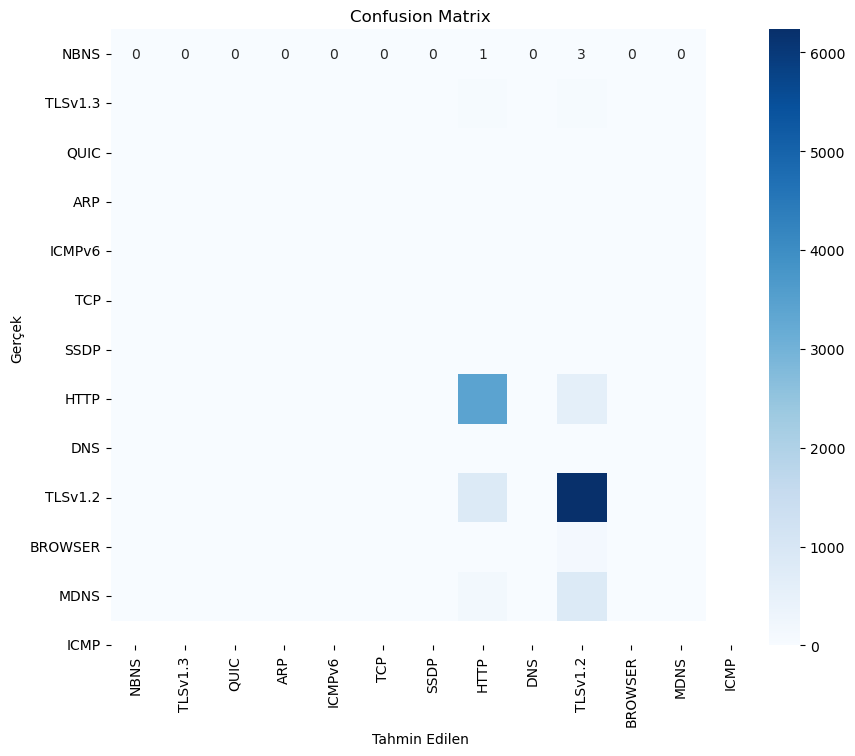

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturalım
model = LogisticRegression(max_iter=1000, random_state=42)

# Modeli eğitelim
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_logistic_regression = model.predict(X_test)

# Modelin doğruluğunu değerlendirelim
logistic_regression_accuracy = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy:", logistic_regression_accuracy)

# Confusion matrix'i hesaplayalım
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# Precision, recall ve F1 score değerlerini hesaplayalım
logistic_regression_precision = precision_score(y_test, y_pred_logistic_regression, average='weighted')
logistic_regression_recall = recall_score(y_test, y_pred_logistic_regression, average='weighted')
logistic_regression_f1 = f1_score(y_test, y_pred_logistic_regression, average='weighted')

print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)

# Tahminleri ve gerçek değerleri bağımlı değişkene göre tabloda gösterme
classes_logistic_regression = model.classes_

print("\nTahminler ve Gerçek Değerler:")
print("\t\t", end="")
for cls in classes_logistic_regression:
    print(cls, end="\t")
print()  # Yeni satır

for i, row in enumerate(cm_logistic_regression):
    print(classes_logistic_regression[i], end="\t\t")
    for cell in row:
        print(cell, end="\t")
    print()  # Yeni satır

# Confusion matrix grafiğini oluşturalım
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logistic_regression, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

<h1 style="color:blue;"> Gradient Boosting Classifier ile Sınıflandırma </h1>

Accuracy: 0.9272009029345373
Precision: 0.9198190575507177
Recall: 0.9272009029345373
F1 Score: 0.9160965127985726


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


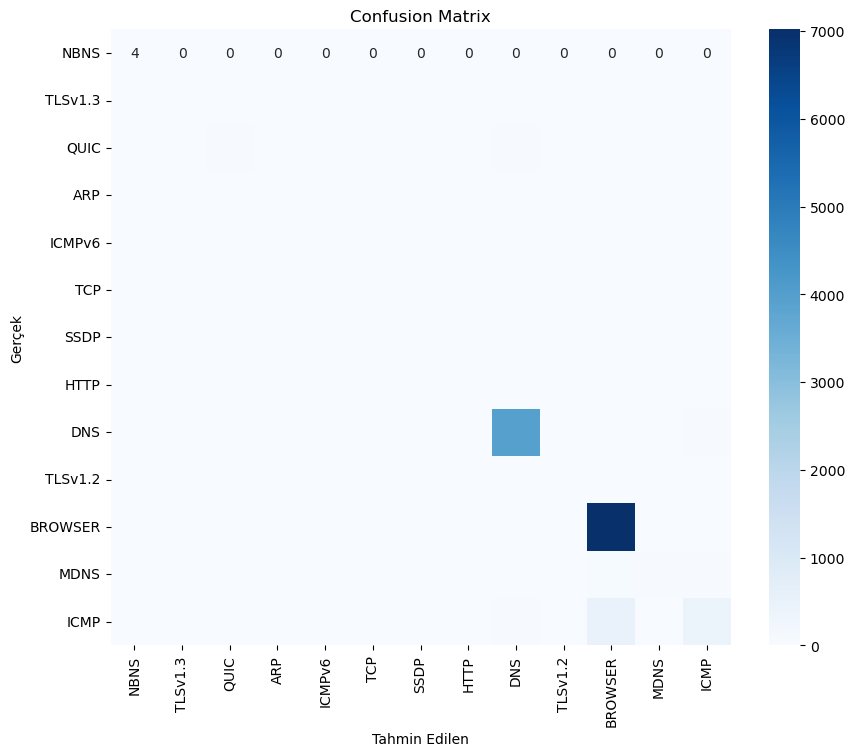

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier modelini oluşturalım
model = GradientBoostingClassifier(random_state=42)

# Modeli eğitelim
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Modelin doğruluğunu hesaplayalım
accuracy_gradient_boosting = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gradient_boosting)

# Precision, recall ve F1 score değerlerini hesaplayalım
precision_gradient_boosting = precision_score(y_test, y_pred, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1 Score:", f1_gradient_boosting)

# Confusion matrix'i oluşturalım
cm_gradient_boosting = confusion_matrix(y_test, y_pred)

# Confusion matrix grafiğini oluşturalım
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gradient_boosting, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

## Modelleri karşılaştırma -  Seçme - Değerlendirme

               Model  Accuracy  Precision    Recall  F1 Score
0        Naive Bayes  0.785150   0.708371  0.785150  0.744670
1      Decision Tree  0.929136   0.923989  0.929136  0.919628
2      Random Forest  0.929136   0.924155  0.929136  0.919570
3      Logistic Reg.  0.778942   0.696603  0.778942  0.735473
4  Gradient Boosting  0.927201   0.919819  0.927201  0.916097


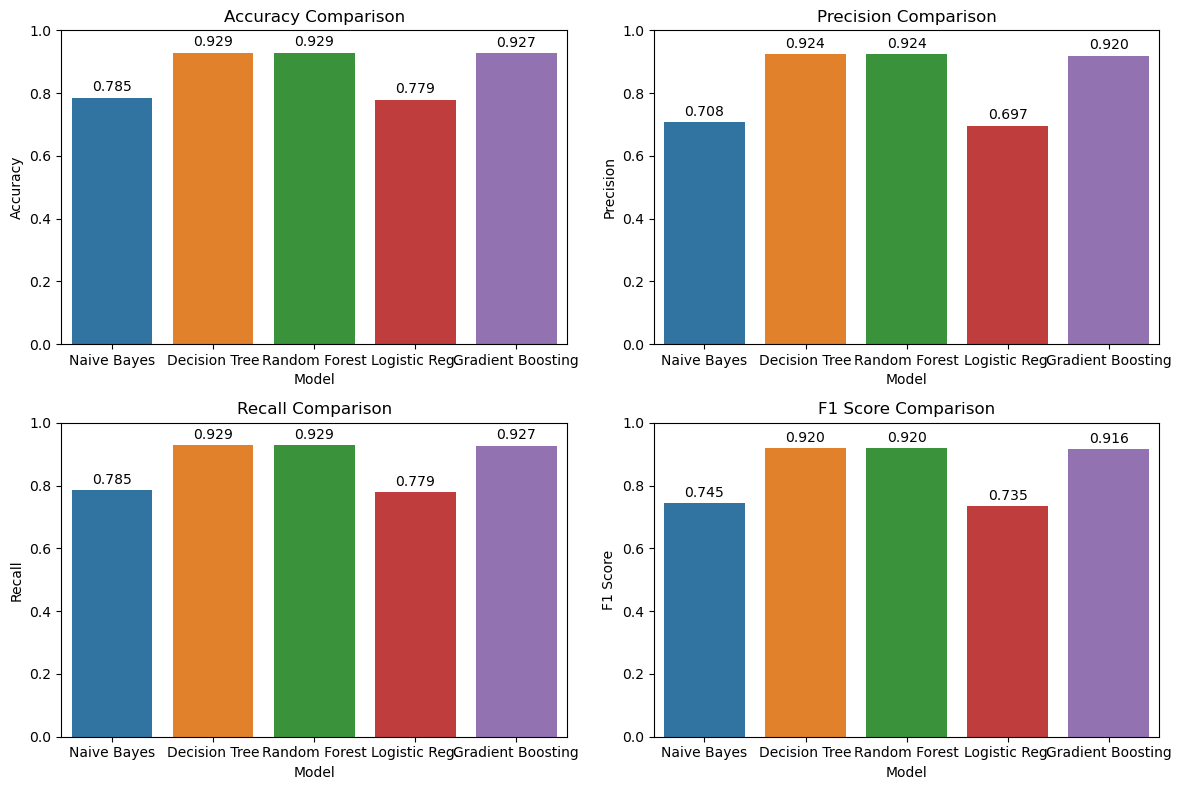

In [127]:
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Reg.','Gradient Boosting']
accuracies = [accuracy_naive_bayes, accuracy_decision_tree, random_forest_accuracy, logistic_regression_accuracy,accuracy_gradient_boosting]
precisions = [precision_naive_bayes, precision_decision_tree, random_forest_precision, logistic_regression_precision, precision_gradient_boosting]
recalls = [recall_naive_bayes, recall_decision_tree, random_forest_recall, logistic_regression_recall,recall_gradient_boosting]
f1_scores = [f1_naive_bayes, f1_decision_tree, random_forest_f1, logistic_regression_f1, f1_gradient_boosting]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Tabloyu yazdıralım
print(performance_df)# Performans metriklerini görselleştirelim
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırlayalım
for index, value in enumerate(performance_df['Accuracy']):
    plt.text(index, value + 0.02, '{:.3f}'.format(value), ha='center')  # Her barın üzerine değerleri yazalım

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=performance_df)
plt.title('Precision Comparison')
plt.ylim(0, 1)
for index, value in enumerate(performance_df['Precision']):
    plt.text(index, value + 0.02, '{:.3f}'.format(value), ha='center')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=performance_df)
plt.title('Recall Comparison')
plt.ylim(0, 1)
for index, value in enumerate(performance_df['Recall']):
    plt.text(index, value + 0.02, '{:.3f}'.format(value), ha='center')

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=performance_df)
plt.title('F1 Score Comparison')
plt.ylim(0, 1)
for index, value in enumerate(performance_df['F1 Score']):
    plt.text(index, value + 0.02, '{:.3f}'.format(value), ha='center')

plt.tight_layout()
plt.show()


Veri seti performans ölçütlerine göre, Decision Tree ve Random Forest modelleri oldukça benzer sonuçlar vermektedir. Her iki model de yüksek doğruluk, hassasiyet, geri çağırma ve F1 skoru sağlamaktadır.

Decision Tree modeli daha basit bir yapıya sahip olduğu için daha hızlı eğitilebilir ve daha kolay yorumlanabilir. Ancak, Random Forest, birden fazla karar ağacını bir araya getirerek daha güçlü bir model oluşturur ve genellikle daha iyi genelleme performansı sağlar.

Daha karmaşık ilişkileri yakalamak ve daha yüksek bir genelleme performansı elde etmek için Random Forest modelini tercih edilmiştir.

<h1 style="color:blue;">Seçilen Method Random Forest ile Kullanıcı Etkileşimli Protokol Sınıfı Tahmini </h1>
 

In [ ]:
from IPython.display import display, Markdown
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

while True:
    
    length = input("Paket uzunluğunu girin (Çıkmak için 'x' tuşuna basın): ")
    if length.lower() == 'x':
        print("Çıkış yapılıyor...")
        break
    
    # Uzunluk değerini kontrol et
    if not length.isdigit():
        print("Lütfen sayısal bir değer girin.")
        continue
    
    time = input("Paket süresini girin: ")
    
    # Zaman değerini kontrol et
    if not time.isdigit():
        print("Lütfen sayısal bir değer girin.")
        continue
    
    length = float(length)
    time = float(time)
    X_new = [[time, length]]

    predicted_protocol = model.predict(X_new)
    display(Markdown(f"**Protokol:** <font color='red'>{predicted_protocol[0]}</font>"))


Paket uzunluğunu girin (Çıkmak için 'x' tuşuna basın):  90
Paket süresini girin:  2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Protokol:** <font color='red'>TLSv1.2</font>

Paket uzunluğunu girin (Çıkmak için 'x' tuşuna basın):  380
Paket süresini girin:  7


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Protokol:** <font color='red'>TLSv1.3</font>